In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [3]:
# Load the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

In [4]:
# Show first 5 data
print("First 5 rows:")
display(df.head())

First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Preprocessing functions
# Check for missing values
print("\nMissing values check:")
display(df.isnull().sum())


Missing values check:


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [6]:
# Now normalize the features
scaler = MinMaxScaler()
features = df.columns[:-1]
df[features] = scaler.fit_transform(df[features])

In [7]:
# Encode class label
encoder = LabelEncoder()
df['species_encoded'] = encoder.fit_transform(df['species'])

print("\nAfter preprocessing:")
display(df.head())


After preprocessing:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_encoded
0,0.222222,0.625000,0.067797,0.041667,setosa,0
1,0.166667,0.416667,0.067797,0.041667,setosa,0
2,0.111111,0.500000,0.050847,0.041667,setosa,0
3,0.083333,0.458333,0.084746,0.041667,setosa,0
4,0.194444,0.666667,0.067797,0.041667,setosa,0


In [8]:
# Summary statistics
print("\nSummary statistics:")
display(df.describe())


Summary statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_encoded
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056,1.000000
std,0.230018,0.181611,0.299203,0.317599,0.819232
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,1.000000
75%,0.583333,0.541667,0.694915,0.708333,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000



Pairplot:


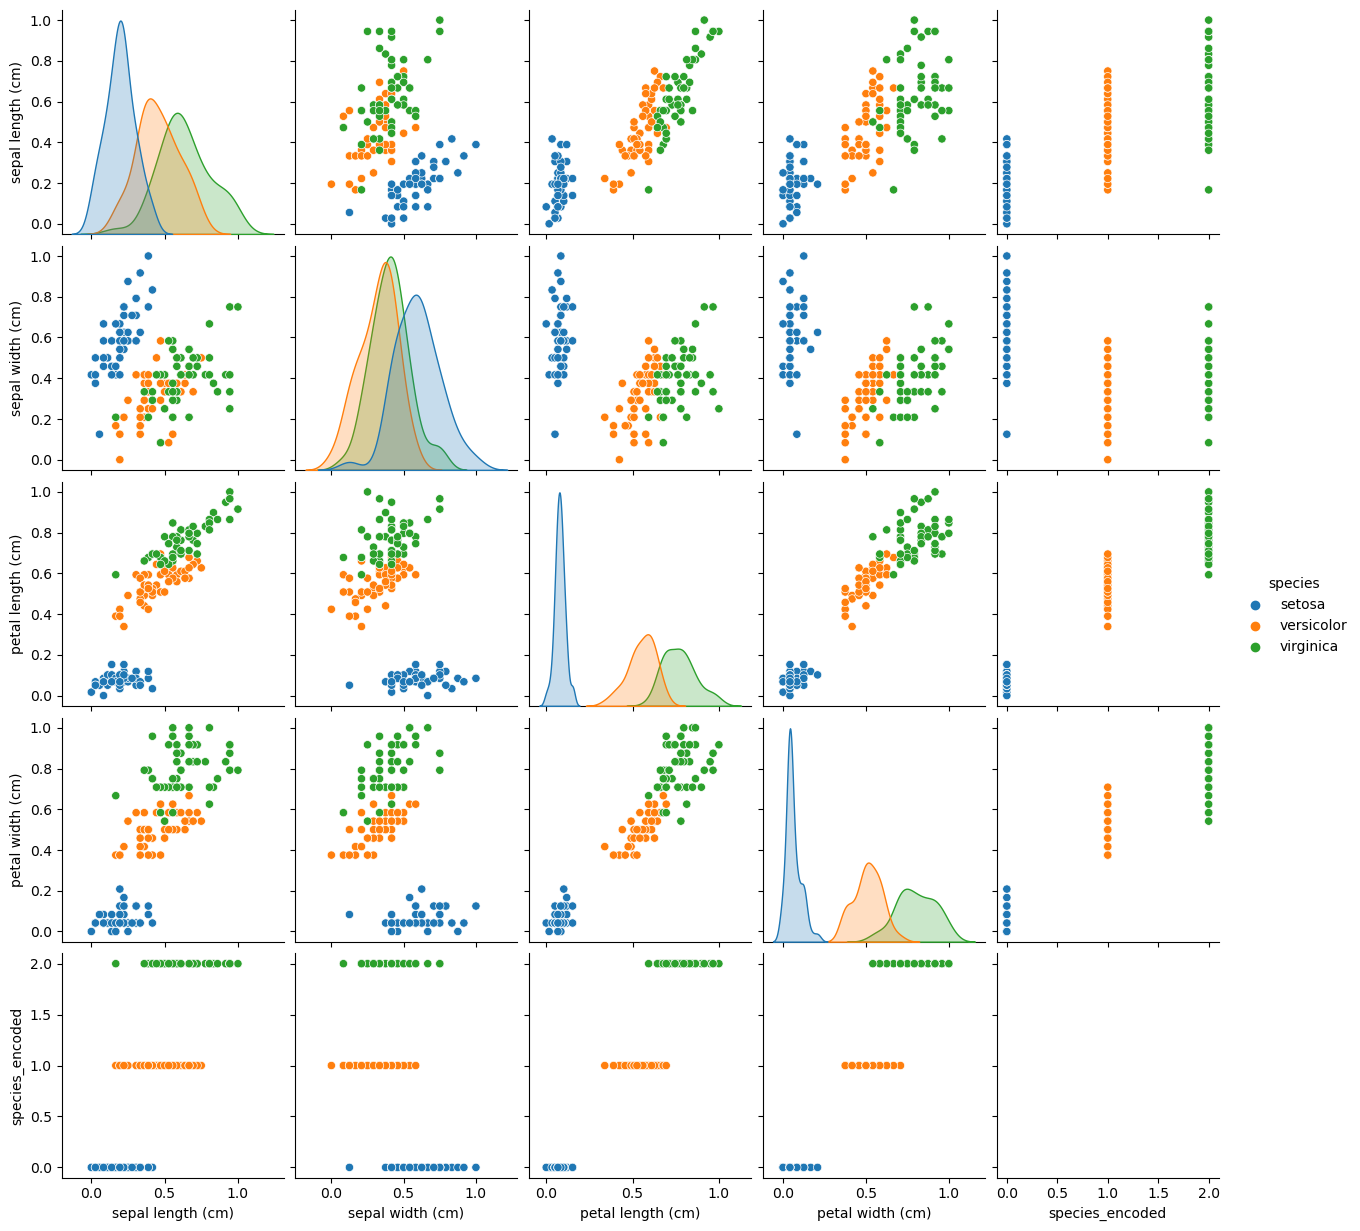

In [9]:
# Pairplot
print("\nPairplot:")
sns.pairplot(df, hue='species')
plt.show()


Correlation heatmap:


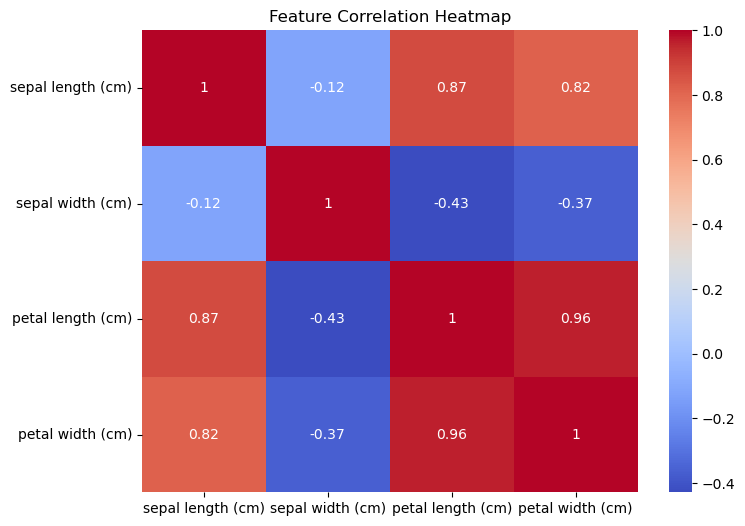

In [10]:
# Correlation heatmap
print("\nCorrelation heatmap:")
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:,:-2].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


Boxplots for outlier detection:


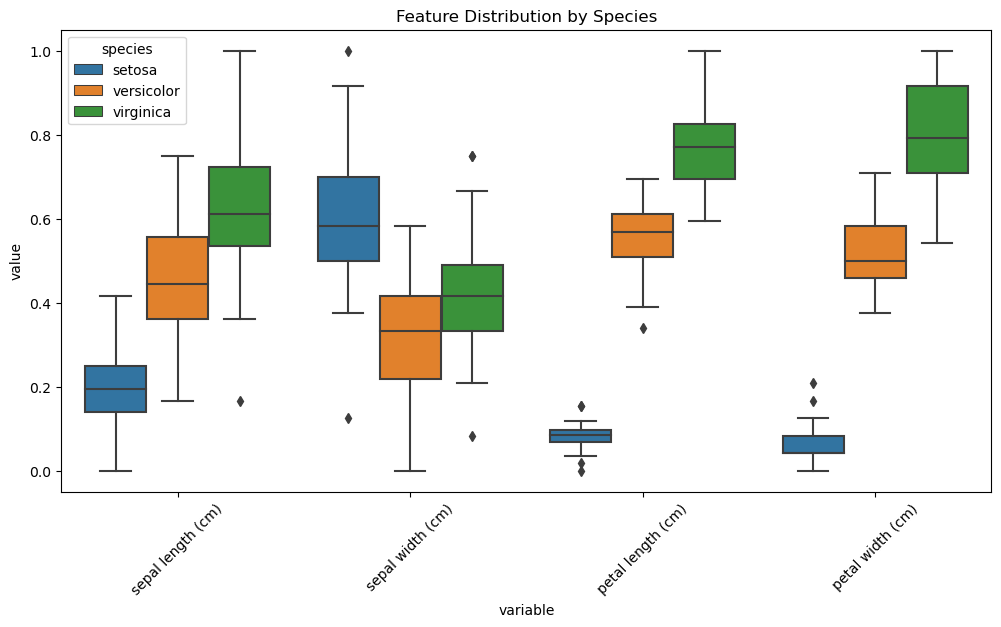

In [11]:
# Boxplots for outlier detection
print("\nBoxplots for outlier detection:")
plt.figure(figsize=(12,6))
df_melted = df.melt(id_vars='species', value_vars=df.columns[:-2])
sns.boxplot(x='variable', y='value', hue='species', data=df_melted)
plt.xticks(rotation=45)
plt.title('Feature Distribution by Species')
plt.show()

In [12]:
# Train-test split
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-2]  # Features (excluding species and encoded species)
y = df['species_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTrain-test split results:")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print("\nClass distribution in training set:")
display(pd.Series(y_train).value_counts())


Train-test split results:
Training set shape: (120, 4)
Test set shape: (30, 4)

Class distribution in training set:


0    40
2    40
1    40
Name: species_encoded, dtype: int64

In [13]:
# Save the preprocessed data
df.to_csv('preprocessing_iris.csv', index=False)